## 4. Principal Components Analysis

### 4.1 Eigenfaces

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Set directory to CroppedYale
os.getcwd()
os.chdir('/Users/michellehsu/Desktop/CMU/Spring 2018/95-828 ML for Problem Solving/Assignment/HW2/hw2_data/CroppedYale/')
path = '/Users/michellehsu/Desktop/CMU/Spring 2018/95-828 ML for Problem Solving/Assignment/HW2/hw2_data/CroppedYale/'

In [4]:
view_list = ['P00A+025E+00', 'P00A+110E+65', 'P00A-050E+00', 'P00A+035E+15', 'P00A+110E-20', 'P00A-050E-40', 'P00A+035E+40', 'P00A+120E+00', 'P00A-060E+20', 'P00A+000E+00', 'P00A+035E+65', 'P00A+130E+20', 'P00A-060E-20', 'P00A+000E+20', 'P00A+035E-20', 'P00A-005E+10', 'P00A-070E+00', 'P00A+000E+45', 'P00A+050E+00', 'P00A-005E-10', 'P00A-070E+45', 'P00A+000E+90', 'P00A+050E-40', 'P00A-010E+00', 'P00A-070E-35', 'P00A+000E-20', 'P00A+060E+20', 'P00A-010E-20', 'P00A-085E+20', 'P00A+000E-35', 'P00A+060E-20', 'P00A-015E+20', 'P00A-085E-20', 'P00A+005E+10', 'P00A+070E+00', 'P00A-020E+10', 'P00A-095E+00', 'P00A+005E-10', 'P00A+070E+45', 'P00A-020E-10', 'P00A-110E+15', 'P00A+010E+00', 'P00A+070E-35', 'P00A-020E-40', 'P00A-110E+40', 'P00A+010E-20', 'P00A+085E+20', 'P00A-025E+00', 'P00A-110E+65', 'P00A+015E+20', 'P00A+085E-20', 'P00A-035E+15', 'P00A-110E-20', 'P00A+020E+10', 'P00A+095E+00', 'P00A-035E+40', 'P00A-120E+00', 'P00A+020E-10', 'P00A+110E+15', 'P00A-035E+65', 'P00A-130E+20', 'P00A+020E-40', 'P00A+110E+40', 'P00A-035E-20']
images = []
count = []
for filename in os.listdir(path):
    if 'yale' in filename:
        newpath = path + filename
        os.chdir(newpath)
        c = 0
        for i in view_list:
            image = filename+'_'+i+'.png'
            if image in os.listdir(newpath):
                c = c+1
                temp = mpimg.imread(filename+'_'+i+'.png')
                images.append(temp.flatten())
        count.append(c)

In [5]:
#Covert list into matrix
D = np.array(images)
#Check for the matrix dimension N*(W.H)=(2432, 32256)
D.shape

(2414, 32256)

In [6]:
#label yi={1,..., 38}
y = np.repeat(range(1,39),count)
y.shape

(2414,)

### 4.1.1 Find the “mean” face. Average the rows of D, reshape the resulting W · H vector mean into a W-width, H-height image, and display this mean image.

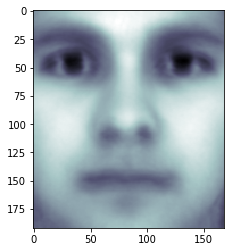

In [7]:
plt.imshow(D.mean(axis=0).reshape(192, 168), cmap=plt.cm.bone)
plt.show() 

### 4.1.2 Demean the data matrix i.e. subtract mean from each row to ensure that the average value of any column of D is 0. Run PCA on the transformed data matrix D. Provide the screeplot.

In [8]:
#demean the matrix
D = D - D.mean(axis=0)[None, :]

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()
pca.fit(D)
variance = pca.explained_variance_ratio_ 
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)

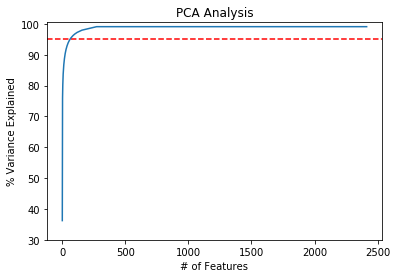

In [11]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.axhline(y = 95, color='r', linestyle='--', label = '95% Explained Variance')
plt.ylim(30,100.5)
plt.plot(var)
plt.show()

From the screeplot, we can see that the variance explained approaches 100 with less than 250 principal components.

### 4.1.3 Plot the first 10 principal components. Let’s call E as the matrix which stores the principal components as rows.

In [12]:
pca10 = PCA(10) 
pca10_fit = pca10.fit(D)

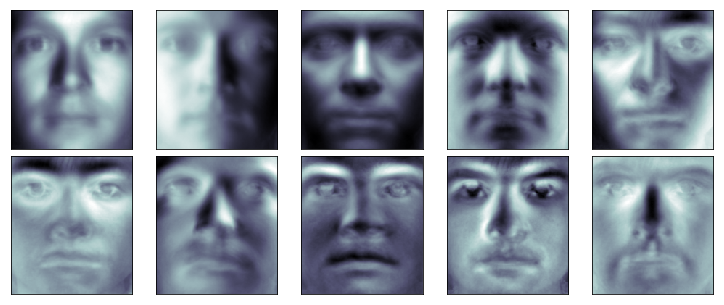

In [13]:
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
for i in range(10): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pca10_fit.components_[i,:], (192,168)), cmap=plt.cm.bone, interpolation='nearest')
plt.show()

### 4.1.4 Project the datapoints onto the principal components by matrix multiplication P = D·E . Plot separate histograms for each of the first 10 PCA projections i.e. the first 10 columns of P.

In [14]:
pca_fit = pca.fit(D)
E = pca_fit.components_
P = np.dot(D, E.T)

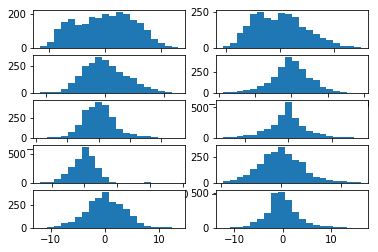

In [15]:
for i in range(1, 11):
    plt.subplot(5, 2, i)
    plt.hist(P[:,i], bins = 20)
plt.show()

--------------

### 4.2 PCA on Text Corpus

In [446]:
#Check the current directory
os.getcwd()
os.chdir('/Users/michellehsu/Desktop/CMU/Spring 2018/95-828 ML for Problem Solving/Assignment/HW2/hw2_data/onion_vs_economist')

In [447]:
#Read the file
voc = pd.read_csv("vocabulary.csv")
xtrain = pd.read_csv("XTrain.csv")
ytrain = pd.read_csv("yTrain.csv")
xtest = pd.read_csv("XTest.csv")
ytest = pd.read_csv("yTest.csv")

### 4.2.1 Find the top principal component of XTrain. Note that the length of the principal compnent is equal to the number of words in Vocabulary. Provide a list of the top-30 words from Vocabulary sorted in decreasing order of the absolute value of their coefficient in the top principal component.

In [448]:
pca_text = PCA(1) 
text_fit = pca_text.fit(xtrain)
text_fit.components_.shape

(1, 26048)

In [449]:
cp = text_fit.components_
cp = pd.DataFrame(cp.T)

In [450]:
cp['abs'] = np.abs(cp[0])
cp.sort_values('abs', ascending = False, inplace = True)
top30 = cp[0:30].index.tolist()
word = []
for i in top30:
        word.extend(voc.loc[i])

In [451]:
word

['liberalis',
 'tripl',
 'resist',
 'pencil',
 'ever',
 'risk',
 'visibl',
 'bizarr',
 'alarm',
 'panacea',
 'scath',
 'face',
 '4m',
 'crowd',
 'such',
 'figur',
 'lead',
 'reveal',
 '1992',
 'talk',
 'mean',
 'noneuropean',
 'bout',
 'standard',
 'leader',
 '2004',
 'inflat',
 'would',
 'higher',
 'match']

### 4.2.2 How many of the top-30 words in the list are stopwords i.e. occur in the stopwords.txt file provided with the data?

In [452]:
#read the stopwords.txt file
with open('stopwords.txt') as f:
    lines = f.readlines()
print(lines)

["for of the and to in on by an from some with is nbsp but as what when where why which how their at upon non its between its during like I The the for of the and to in on by an from some with is nbsp but as what when where why which how s x their at upon non its between i i'm my mine you your they their them a about above after all am an and any are as at be because been before being below between both but by for from further had has have having how how's i i'd i'll i'm i've if in into is it it's its itself let's me more most my myself of off on once only or other ought our ours ourselves out over own same so some such than that that's the their theirs them themselves then there there's these they they'd they'll they're they've this those through to too under until up very was we we'd we'll we're we've were what what's when when's where where's which while who who's whom why why's with won't would you you'd you'll you're you've your yours yourself yourselves some somehow someone somet

In [453]:
#Convert list to string
lines = ' '.join(lines)
stopwords = lines.split()

In [454]:
find = []
for i in stopwords:
    if i in word:
        find.append(i)

In [455]:
find

['such', 'would']

There are two words belong to stopword, which are 'would' and 'such'.

-----

## 5. Logistic Regression

In [31]:
#Data exploration
voc.head()
voc.info()
len(voc) # 26047 rows
voc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26047 entries, 0 to 26046
Data columns (total 1 columns):
after    26047 non-null object
dtypes: object(1)
memory usage: 203.6+ KB


,after
count,26047
unique,26047
top,eleg
freq,1


In [32]:
xtrain.info()
len(xtrain) # 579 rows
ytrain.info()
len(ytrain) # 579 rows
xtest.info()
len(xtest) # 144 rows
ytest.info()
len(ytest) # 144 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Columns: 26048 entries, 1 to 0.24961
dtypes: int64(26048)
memory usage: 115.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 1 columns):
1    579 non-null int64
dtypes: int64(1)
memory usage: 4.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Columns: 26048 entries, 0 to 0.24958
dtypes: int64(26048)
memory usage: 28.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
1    144 non-null int64
dtypes: int64(1)
memory usage: 1.2 KB


144

In [33]:
xtrain.describe()

,1,1.1,0,0.1,0.2,0.3,0.4,0.5,1.2,0.6,...,0.24953,0.24954,0.24955,0.24956,0.24957,1.1085,0.24958,0.24959,0.24960,0.24961
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,...,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,0.604491,0.941278,0.329879,0.098446,0.065630,0.053541,0.537133,0.269430,0.082902,0.259067,...,0.015544,0.027634,0.044905,0.024180,0.027634,0.024180,0.027634,0.025907,0.032815,0.032815
std,0.489383,0.235307,0.470576,0.298174,0.247849,0.225303,0.499050,0.444047,0.275972,0.438501,...,0.123810,0.164063,0.207275,0.153739,0.164063,0.153739,0.164063,0.158994,0.178307,0.178307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
ytrain.describe()

,1
count,579.000000
mean,0.271157
std,0.444941
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### 5.1 Fit a logistic regression classifier to the provided data (with no regularization). State the test misclassification rate. Also, produce a confusion matrix for the classifier.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [545]:
#Create a logistic regression model instance
#Set regularization parameter C to a large number to indicate no regularization since lambda = 1/C
logmodel = LogisticRegression(C = 10000000000000000000000)
logmodel.fit(xtrain, ytrain)
pred = logmodel.predict(xtest)

Text(0.5,1,'Confusion matrix without regularization')

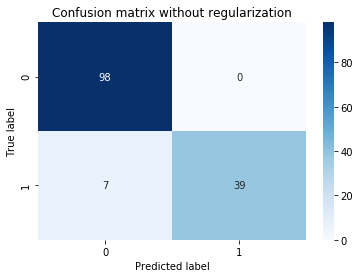

In [546]:
cm = confusion_matrix(ytest, pred)
sns.heatmap(cm, cmap='Blues', annot = True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix without regularization')

In [547]:
#Suppose The Onion as the positive class
tp = cm[1,1]
fp = cm[0,1]
tn = cm[0,0]
fn = cm[1,0]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print('Precision is',precision)
print('Recall is',recall)

Precision is 1.0
Recall is 0.847826086957


In [548]:
# The Onion is positive
misclassification_o = (fp+fn)/(fp+fn+tp+tn)
misclassification_o 

0.048611111111111112

Suppose The Onion is the positive class, the missclassification rate of logistic regression is 0.0486.

### 5.2 Plot the precision-recall curve and the ROC curve for the model using test predictions and groundtruth.

In [549]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))

             precision    recall  f1-score   support

          0       0.93      1.00      0.97        98
          1       1.00      0.85      0.92        46

avg / total       0.95      0.95      0.95       144



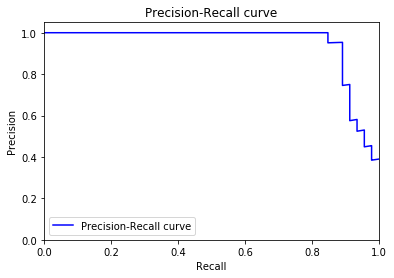

In [550]:
#Precision-Recall curve
from sklearn.metrics import precision_recall_curve
prob = logmodel.fit(xtrain, ytrain).predict_proba(xtest)
precision, recall, _ = precision_recall_curve(ytest, prob[:,1])
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

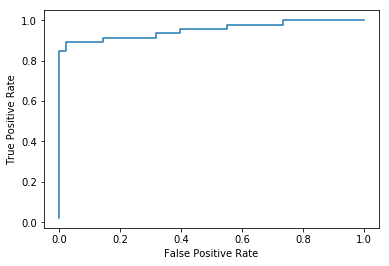

In [551]:
#ROC curve
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(ytest, prob[:,1], pos_label=1)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show() 

### 5.3 Plot a wordcloud where the font size for each word is the magnitude of its logistic regression coefficient. Show words with a positive coefficient in green, and words with a negative coefficient in red. Include the wordcloud in your report. What differences do you see between prominent green and red words?

In [552]:
from wordcloud import WordCloud

In [553]:
coe = pd.DataFrame(logmodel.fit(xtrain, ytrain).coef_.T)
coe['word'] = voc['after']

In [554]:
red = []
for i in range(len(coe)):
    if coe[0][i] < 0:
        red.append(coe['word'][i])

In [555]:
green = []
for i in range(len(coe)):
    if coe[0][i] >= 0:
        green.append(coe['word'][i])

In [556]:
color_to_words = {'green': green,'red': red }
default_color = 'black'

In [557]:
from wordcloud import get_single_color_func
class GroupedColorFunc(object):
    
    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [558]:
test = coe.set_index('word')[0].to_dict()

In [559]:
for key, value in test.items():
    newvalue= abs(value)
    test[key] = newvalue

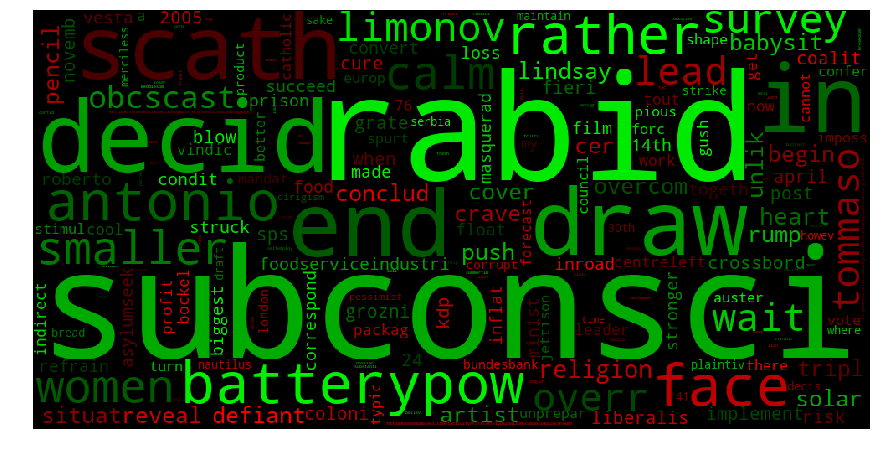

In [560]:
wordcloud = WordCloud(width = 1000, height = 500).generate(str(coe['word'])).generate_from_frequencies(test)
plt.figure(figsize=(15,8))
grouped_color_func = GroupedColorFunc(color_to_words, default_color)
wordcloud.recolor(color_func = grouped_color_func)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The prominent green is much larger than prominenet red, meaning the magnitude of words with positive coefficients is larger than the ones with negative coefficients. Also, the number of green word is more than the number of the red word.

### 5.4 In this question, we will use l1 regularized logistic regression. Use cross-validation on the training data to tune the regularization hyperparameter of l1 regularization. Plot the regularization hyperparameter λ versus the cross-validation error. What is the optimal hyperparameter λ chosen through CV?

In [575]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv = LogisticRegressionCV(solver='liblinear', penalty='l1')
lr_cv.fit(xtrain, ytrain)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [576]:
score = lr_cv.scores_
error = 1 - score.get(1)
lma = 1/lr_cv.Cs_
p = np.mean(error, axis=0)

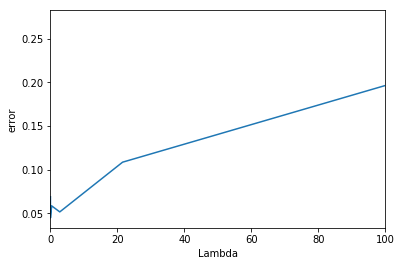

In [577]:
plt.plot(lma, p)
plt.xlim(0,100)
plt.xlabel('Lambda')
plt.ylabel('error')
plt.show()

In [578]:
#Array of C that maps to the best scores across every class.
1/lr_cv.C_

array([ 0.00599484])

The optimal λ chosen through CV is 0.00599484.

### 5.5 Train an l1 regularized logistic regression model on all of training data using the optimal hyperparameter λ∗cv chosen through CV. Use the resulting model to predict on the test set. State the test misclassification rate. Is the test error lower than that for the unregularized model? Also, produce a confusion matrix for the classifier.

In [579]:
prediction = lr_cv.predict(xtest)

Text(0.5,1,'Confusion matrix with regularization')

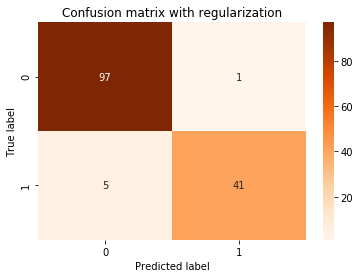

In [580]:
#Confusion matrix with regularization
cmcv = confusion_matrix(ytest, prediction)
sns.heatmap(cmcv, cmap='Oranges', annot = True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix with regularization')

In [581]:
#Suppose The Onion as the positive class
tpcv = cmcv[1,1]
fpcv = cmcv[0,1]
tncv = cmcv[0,0]
fncv = cmcv[1,0]
precisioncv = tpcv/(tpcv+fpcv)
recallcv = tpcv/(tpcv+fncv)
print('Precision is',precisioncv)
print('Recall is',recallcv)

Precision is 0.97619047619
Recall is 0.891304347826


In [582]:
# The Onion is positive
misclassification_cv = (fpcv+fncv)/(fpcv+fncv+tpcv+tncv)
misclassification_cv 

0.041666666666666664

Suppose The Onion is the positive class, the missclassification rate of logistic regression with regularization is 0.041667. The test error is lower than for the unregularized model.

### 5.6 Plot the precision-recall curve and the ROC curve for the regularized model using test predictions and groundtruth.

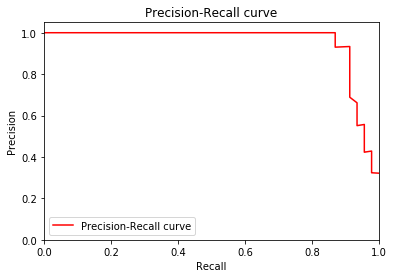

In [60]:
#Precision-Recall curve
probcv = lr_cv.fit(xtrain, ytrain).predict_proba(xtest)
precision, recall, _ = precision_recall_curve(ytest, probcv[:,1])
plt.plot(recall, precision, color='r', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

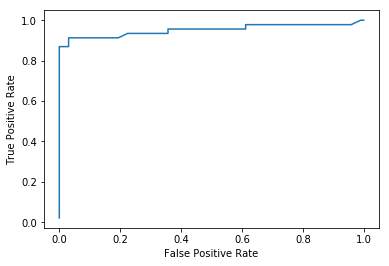

In [61]:
#ROC curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, probcv[:,1], pos_label=1)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show() 

### 5.7 Plot a wordcloud where the font size for each word is the magnitude of its logistic regression coefficient in the regularized model. Show words with a positive coefficient in green, and words with a negative coefficient in red. Include the wordcloud in your report. What differences do you see between this wordcloud and the one from the unregularized model?

In [62]:
coecv = pd.DataFrame(lr_cv.fit(xtrain, ytrain).coef_.T)
coecv['word'] = voc['after']

In [63]:
coecv = coecv[coecv[0] != 0]

In [64]:
redcv = []
for i in coecv.index:
    if coecv[0][i] < 0:
        redcv.append(coecv['word'][i])

In [65]:
greencv = []
for i in coecv.index:
    if coecv[0][i] >= 0:
        greencv.append(coecv['word'][i])

In [66]:
color_to_words = {'green': greencv,'red': redcv }

In [67]:
testcv = coecv.set_index('word')[0].to_dict()
for key, value in testcv.items():
    newvalue= abs(value)
    testcv[key] = newvalue

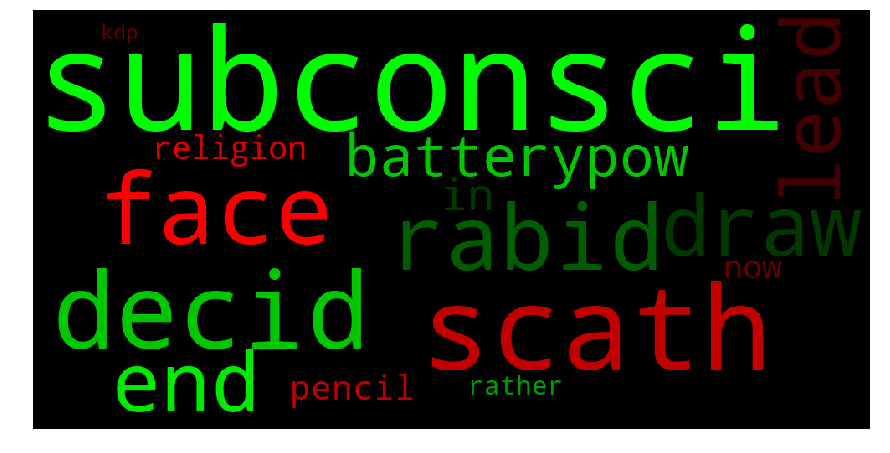

In [68]:
wordcloudcv = WordCloud(width = 1000, height = 500).generate(str(coecv['word'])).generate_from_frequencies(testcv)
plt.figure(figsize=(15,8))
grouped_color_func = GroupedColorFunc(color_to_words, default_color)
wordcloudcv.recolor(color_func = grouped_color_func)
plt.imshow(wordcloudcv)
plt.axis("off")
plt.show()

Different from the unregularized model, the wordcloud with regularization has fewer words and the size of the word, either positive or negative, also changes a little bit.

---------

## 6. Decision Tree

In [24]:
D_df = pd.DataFrame(D)
P_df = pd.DataFrame(P)
y_df = pd.DataFrame(y)

In [18]:
from sklearn.cross_validation import train_test_split

In [19]:
D_train, D_test, P_train, P_test, y_train, y_test = train_test_split(D_df, P_df, y_df, test_size=0.2)

### 6.1 Fit a decision tree model using the training data D and y, and report the number of terminal nodes (leaves) and the depth of the tree. You should let the tree grow until it’s impossible to split (all records in data subset have the same output or the same set of input attributes). Use the model to predict yˆ on test set, and evaluate your predictions against the true labels y. State the test error. 

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()
dtree.fit(D_train, y_train)
d_pred = dtree.predict(D_test)

In [25]:
dtree_cm = confusion_matrix(y_test, d_pred)
1-(sum(dtree_cm.diagonal())/dtree_cm.sum())

0.21739130434782605

In [41]:
d_nodes = dtree.tree_.node_count
d_left = dtree.tree_.children_left
d_right = dtree.tree_.children_right
d_leaf = 0
node_depth = np.zeros(shape = d_nodes, dtype=np.int64)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1  
    if (d_left[node_id] != d_right[node_id]):
        stack.append((d_left[node_id], parent_depth + 1))
        stack.append((d_right[node_id], parent_depth + 1))
    else:
        d_leaf = d_leaf +1
print(d_leaf)

232


In [40]:
print(dtree.tree_.max_depth)

46


The depth of the full tree is 46 and the number of terminal nodes is 232. The test error is 0.2174.

### 6.2 Now you decide to prune the tree, because it is a bit too large. Fit a pruned tree where the maximum depth hyperparameter is chosen using 10-fold cross-validation (CV). Evaluate the pruned tree on test data. State the test error. Did the pruning help improve test error compared to the previous question? Plot the maximum depth hyperparameter versus the cross-validation error.

In [363]:
from sklearn.cross_validation import cross_val_score

In [364]:
depth = []
for i in range(10,110,10):
    tree = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator= tree, X=D_train, y=y_train[0], cv=10, n_jobs=4)
    depth.append((i, scores.mean()))
print(depth)

[(10, 0.32731703943308993), (20, 0.53595855052913977), (30, 0.73421529909896643), (40, 0.78079301862191008), (50, 0.78031704027953164), (60, 0.77975524252672268), (70, 0.77975524252672268), (80, 0.77975524252672268), (90, 0.77975524252672268), (100, 0.77975524252672268)]


In [365]:
depth = np.array(depth)
max(depth[:,1])

0.78079301862191008

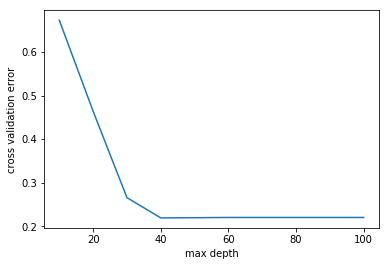

In [366]:
plt.plot(depth[:,0], 1-depth[:,1])
plt.xlabel('max depth')
plt.ylabel('cross validation error')
plt.show()

From the above graph, we can see that the cross validation error is in its lowest at max depth equals to 40. Therefore, choosing max_depth = 40 to fit the decision tree model.

In [367]:
dtree_prune = DecisionTreeClassifier(max_depth = 40)
dtree_prune.fit(D_train, y_train)
d_pred_prune = dtree_prune.predict(D_test)

In [368]:
dtree_cm_prune = confusion_matrix(y_test, d_pred_prune)
#Calculate test error
1-(sum(dtree_cm_prune.diagonal())/dtree_cm_prune.sum())

0.21560574948665301

The test error for the pruned tree is 0.2156, which is slightly lower than the unpruned tree.

### 6.3 Fit a decision tree model using the principal component training data P and y, and report the number of terminal nodes (leaves) and the depth of the tree. Use the model to predict yˆ on test set, and evaluate your predictions against the true labels y. State the test error.

In [27]:
ptree = DecisionTreeClassifier()
ptree.fit(P_train, y_train)
p_pred = ptree.predict(P_test)

In [393]:
ptree_cm = confusion_matrix(y_test, p_pred)
#Calculate test error
1-(sum(ptree_cm.diagonal())/ptree_cm.sum())

0.55646817248459957

In [42]:
p_nodes = ptree.tree_.node_count
p_left = ptree.tree_.children_left
p_right = ptree.tree_.children_right
p_leaf = 0
node_depth_p = np.zeros(shape = p_nodes, dtype=np.int64)
stack_p = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack_p) > 0:
    node_id, parent_depth = stack_p.pop()
    node_depth_p[node_id] = parent_depth + 1
    
    if (p_left[node_id] != p_right[node_id]):
        stack_p.append((p_left[node_id], parent_depth + 1))
        stack_p.append((p_right[node_id], parent_depth + 1))
    else:
        p_leaf = p_leaf +1
print(p_leaf)

558


In [43]:
print(ptree.tree_.max_depth)

54


The depth of the full tree is 54 and the number of terminal nodes is 558. The test error is 0.5564.

### 6.4 Again fit a pruned tree where the maximum depth hyperparameter is chosen using 10-fold cross-validation (CV). Evaluate the pruned tree on test data. State the test error. Did the pruning help improve test error compared to the previous question? Plot the maximum depth hyperparameter versus the cross-validation error.

In [385]:
pdepth = []
for i in range(10,110,10):
    tree = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator= tree, X=P_train, y=y_train[0], cv=10, n_jobs=4)
    pdepth.append((i, scores.mean()))
print(pdepth)

[(10, 0.33712725711596714), (20, 0.42250926568822794), (30, 0.42972995399212011), (40, 0.43337658601578888), (50, 0.4254123765269533), (60, 0.42695459435464328), (70, 0.42695459435464328), (80, 0.42695459435464328), (90, 0.42695459435464328), (100, 0.42695459435464328)]


In [386]:
pdepth = np.array(pdepth)
max(pdepth[:,1])

0.43337658601578888

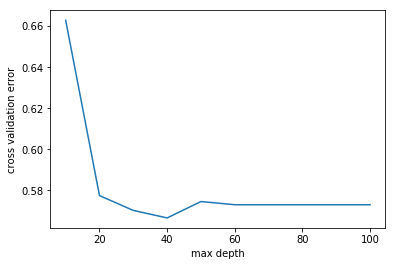

In [387]:
plt.plot(b[:,0], 1-pdepth[:,1])
plt.xlabel('max depth')
plt.ylabel('cross validation error')
plt.show()

From the above graph, we can see that the cross validation error using P is in its lowest at max depth equals to 40. Therefore, choosing max_depth = 40 to fit the decision tree model.

In [29]:
ptree_prune = DecisionTreeClassifier(max_depth = 40)
ptree_prune.fit(P_train, y_train)
p_pred_prune = ptree_prune.predict(P_test)

In [30]:
ptree_cm_prune = confusion_matrix(y_test, p_pred_prune)
#Calculate test error
1-(sum(ptree_cm_prune.diagonal())/ptree_cm_prune.sum())

0.55279503105590067

The test error is 0.5527, which is slightly lower than the unpruned tree.

### 6.5 Now instead of tuning just the maximum tree depth, perform 2D cross-validation on the training data P and y to tune two hyperparameters – (a) the maximum tree depth in decision tree training, and (b) the number of top principal components used as features. Plot a heatmap where X-axis is the maximum tree depth hyperparameter, Y-axis is the number of top principal component features used, and the heat value is the cross-validation error. What is the combination of hyperparameters that minimzes cross-validation error?

In [45]:
from sklearn.cross_validation import cross_val_score

In [132]:
cvscore = []
for j in range(0,len(E),200):
    temp_P = P_train.loc[:,0:j]
    for i in range(10,110,10):
        temptree = DecisionTreeClassifier(max_depth=i)
        scores = cross_val_score(estimator = temptree, X= temp_P, y=y_train[0], cv=10, n_jobs=4)
        cvscore.append((j, i,scores.mean()))
print(cvscore)

[(0, 10, 0.04519790847543801), (0, 20, 0.042928653371674681), (0, 30, 0.036771229165072909), (0, 40, 0.036852094233681111), (0, 50, 0.03848615769866158), (0, 60, 0.037949541537045418), (0, 70, 0.037949541537045418), (0, 80, 0.037949541537045418), (0, 90, 0.037949541537045418), (0, 100, 0.037949541537045418), (200, 10, 0.36347141409289202), (200, 20, 0.48558336865721125), (200, 30, 0.49992466196921537), (200, 40, 0.50290424133633493), (200, 50, 0.50611633541685597), (200, 60, 0.50557285715598643), (200, 70, 0.50557285715598643), (200, 80, 0.50557285715598643), (200, 90, 0.50557285715598643), (200, 100, 0.50557285715598643), (400, 10, 0.36076259791340393), (400, 20, 0.45891427098121379), (400, 30, 0.4892432987595744), (400, 40, 0.48769617042765789), (400, 50, 0.48651779333265022), (400, 60, 0.48709969934933889), (400, 70, 0.48709969934933889), (400, 80, 0.48709969934933889), (400, 90, 0.48709969934933889), (400, 100, 0.48709969934933889), (600, 10, 0.36247704427998445), (600, 20, 0.45872

In [140]:
cvscore[0][2]
maxscore = 0
num_pca = 0
depth_cv = 0
for i in range(0,len(cvscore)):
    if cvscore[i][2] > maxscore:
        maxscore = cvscore[i][2]
        num_pca = cvscore[i][0]
        depth_cv = cvscore[i][1]

In [143]:
print(maxscore)
print(num_pca)
print(depth_cv)

0.506116335417
200
50


In [167]:
result = pd.DataFrame(cvscore)

In [172]:
result['error']= 1-result[2]
result = result.drop(2, 1)

In [174]:
result = result.pivot(0,1,'error')

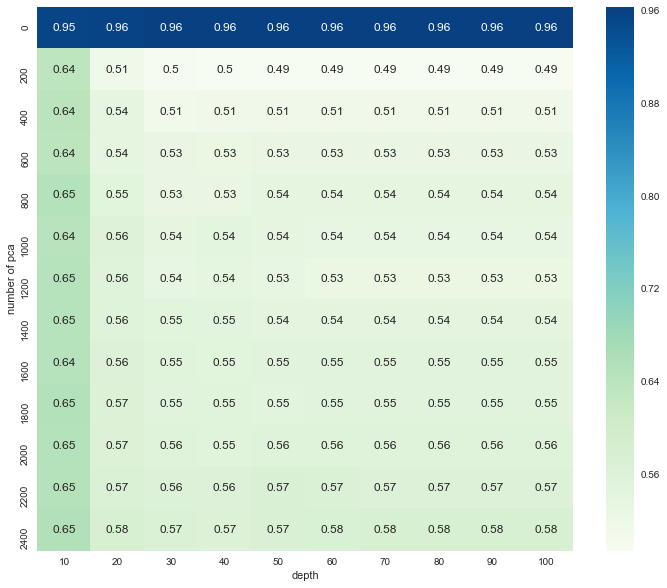

In [178]:
sns.set(rc={'figure.figsize':(12,10)})
heat = sns.heatmap(result, cmap='GnBu', annot = True)
plt.ylabel('number of pca')
plt.xlabel('depth')
plt.show()

From the heatmap, we can see that the optimal number of principal components is 10 and the optimal max depth of tree is 50 with test error of 0.49.

### 6.6 Using the optimal combination of hyperparameters you have found, train a model using the entire training set. Use the model to predict yˆ on test set, and evaluate your predictions against the true labels y. State the test error. Did the 2D hyperparameter search help improve test error compared to the 1D hyperparameter search for maximum tree depth?

In [179]:
opt_P = P_train.loc[:,0:200]
opttree = DecisionTreeClassifier(max_depth=50)

In [182]:
opt_fit = opttree.fit(opt_P, y_train)
opt_pred = opttree.predict(P_test.loc[:,0:200])

In [183]:
opt_cm = confusion_matrix(y_test.loc[:,0:200], opt_pred)
#Calculate test error
1-(sum(opt_cm.diagonal())/opt_cm.sum())

0.49689440993788825

The test error in 2D hyperparameter tuning is 0.49689, which is lower than 1D hyperparameter search for maximum tree depth.

### 6.7 Code and perform nested cross-validation to tune the maximum depth hyperparameter of decision trees as well as the number of top principal components features chosen. Provide K = 10 and K′ = 10 as inputs to your nested cross-validation routine. State the test error. Is it higher or lower than the test error obtained using a separately-held test dataset? Please include your code in the PDF answers report you submit.

In [213]:
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV

In [210]:
#P_train, P_test, y_train, y_test = train_test_split(D_df, P_df, y_df, test_size=0.2)
P_all = pd.concat([P_train, P_test])
y_all = pd.concat([y_train, y_test])

In [285]:
outter_score

[(600, 40, 0.50678862654081003), (600, 40, 0.50678862654081003)]

# 6.7 Code

```python
inner_score = []
outter_score = []
#create the placeholder of StratifiedKFold for outer 
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)
for outter_train, outter_test in outer_cv.split(P_all, y_all):
    for j in range(0,len(inner_train),200):
        temp_P = P_all[inner_train].loc[:,0:j]
        for i in range(10,110,10):
            temptree = DecisionTreeClassifier(max_depth=i)
            scores = cross_val_score(estimator = temptree, X= temp_P, y=y_all[0], cv=10, n_jobs=4)
            inner_score.append((j, i,scores.mean()))
    inner_maxscore = 0
    inner_num_pca = 0
    inner_depth_cv = 0
    for i in range(0,len(inner_score)):
        if inner_score[i][2] > maxscore:
            inner_maxscore = inner_score[i][2]
            inner_num_pca = inner_score[i][0]
            inner_depth_cv = inner_score[i][1]
    outter_score.append((inner_num_pca, inner_depth_cv ,inner_maxscore))
```